# Assignment - 15   Random Forest Fraud_check

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [145]:
df = pd.read_csv('Fraud_check.csv')

In [146]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [147]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [148]:
df.shape

(600, 6)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [150]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [151]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [152]:
df.nunique()

Undergrad            2
Marital.Status       3
Taxable.Income     599
City.Population    598
Work.Experience     31
Urban                2
dtype: int64

In [153]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [154]:
df.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


In [155]:
df = df.rename({'Undergrad':'under_grad', 'Marital.Status':'marital_status', 'Taxable.Income':'taxable_income',
                    'City.Population':'city_population', 'Work.Experience':'work_experience', 'Urban':'urban'}, axis = 1)
df.head()

,under_grad,marital_status,taxable_income,city_population,work_experience,urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


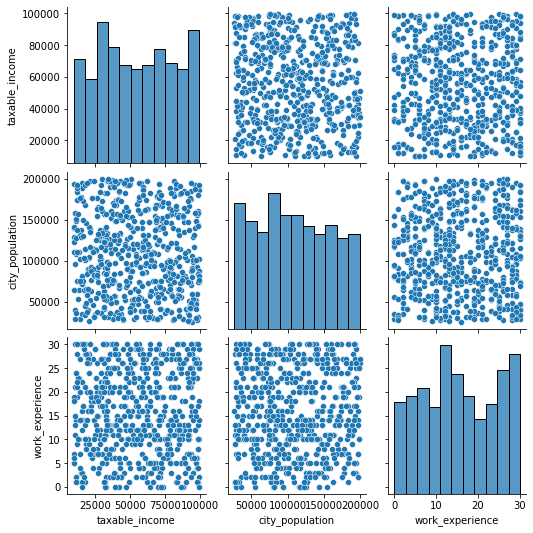

In [156]:
sns.pairplot(df);

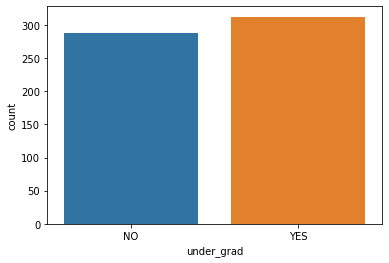

In [60]:
sns.countplot(df['under_grad'])
plt.show()

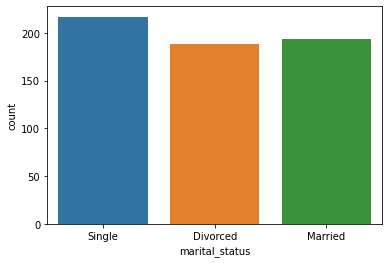

In [61]:
sns.countplot(df['marital_status'])
plt.show()

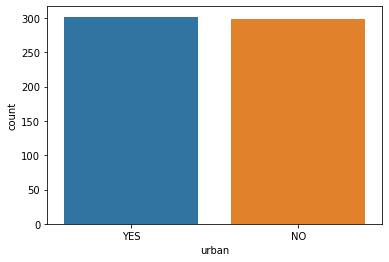

In [62]:
sns.countplot(df['urban'])
plt.show()

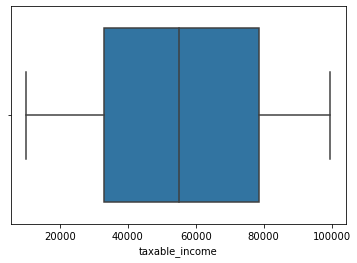

In [63]:
# Checking for outliers in numerical data
sns.boxplot(df['taxable_income'])
plt.show()

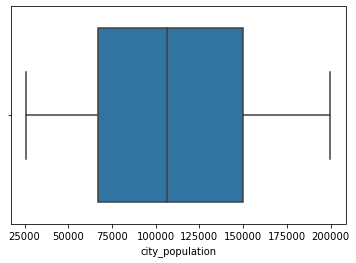

In [64]:
sns.boxplot(df['city_population'])
plt.show()

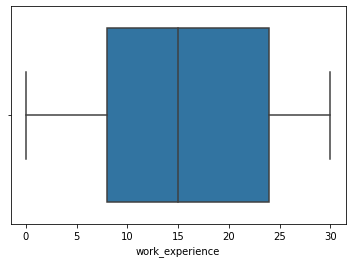

In [65]:
sns.boxplot(df['work_experience'])
plt.show()

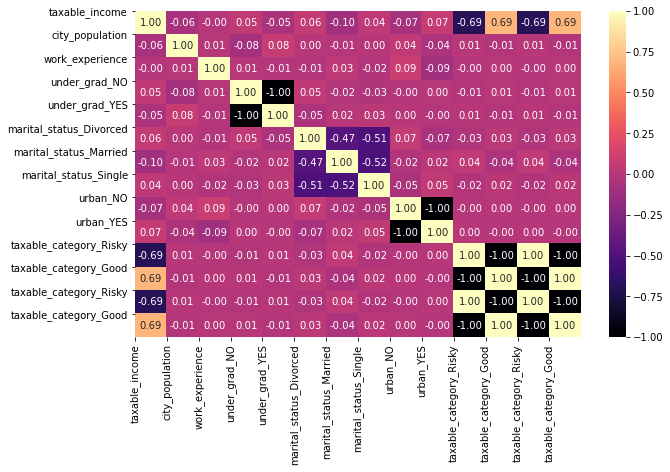

In [129]:
# Correlation analysis for data
corr = df.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 6))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [80]:
df = pd.get_dummies(df)

In [81]:
df.head()

,taxable_income,city_population,work_experience,under_grad_NO,under_grad_YES,marital_status_Divorced,marital_status_Married,marital_status_Single,urban_NO,urban_YES,taxable_category_Risky,taxable_category_Good
0,68833,50047,10,1,0,0,0,1,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1,0,1
2,36925,160205,30,1,0,0,1,0,0,1,0,1
3,50190,193264,15,0,1,0,0,1,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0,0,1


In [82]:
df['taxable_category'] = pd.cut(x = df['taxable_income'], bins = [10002,30000,99620], labels = ['Risky', 'Good'])
df

,taxable_income,city_population,work_experience,under_grad_NO,under_grad_YES,marital_status_Divorced,marital_status_Married,marital_status_Single,urban_NO,urban_YES,taxable_category_Risky,taxable_category_Good,taxable_category
0,68833,50047,10,1,0,0,0,1,0,1,0,1,Good
1,33700,134075,18,0,1,1,0,0,0,1,0,1,Good
2,36925,160205,30,1,0,0,1,0,0,1,0,1,Good
3,50190,193264,15,0,1,0,0,1,0,1,0,1,Good
4,81002,27533,28,1,0,0,1,0,1,0,0,1,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1,0,1,Good
596,69967,55369,2,0,1,1,0,0,0,1,0,1,Good
597,47334,154058,0,1,0,1,0,0,0,1,0,1,Good
598,98592,180083,17,0,1,0,1,0,1,0,0,1,Good


<AxesSubplot:xlabel='taxable_category', ylabel='count'>

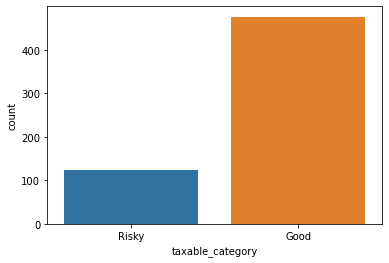

In [83]:
sns.countplot(df['taxable_category'])

In [84]:
df['taxable_category'].value_counts()

Good     476
Risky    124
Name: taxable_category, dtype: int64

In [85]:
data = df.drop('taxable_income', axis = 1)
data

,city_population,work_experience,under_grad_NO,under_grad_YES,marital_status_Divorced,marital_status_Married,marital_status_Single,urban_NO,urban_YES,taxable_category_Risky,taxable_category_Good,taxable_category
0,50047,10,1,0,0,0,1,0,1,0,1,Good
1,134075,18,0,1,1,0,0,0,1,0,1,Good
2,160205,30,1,0,0,1,0,0,1,0,1,Good
3,193264,15,0,1,0,0,1,0,1,0,1,Good
4,27533,28,1,0,0,1,0,1,0,0,1,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1,0,1,Good
596,55369,2,0,1,1,0,0,0,1,0,1,Good
597,154058,0,1,0,1,0,0,0,1,0,1,Good
598,180083,17,0,1,0,1,0,1,0,0,1,Good


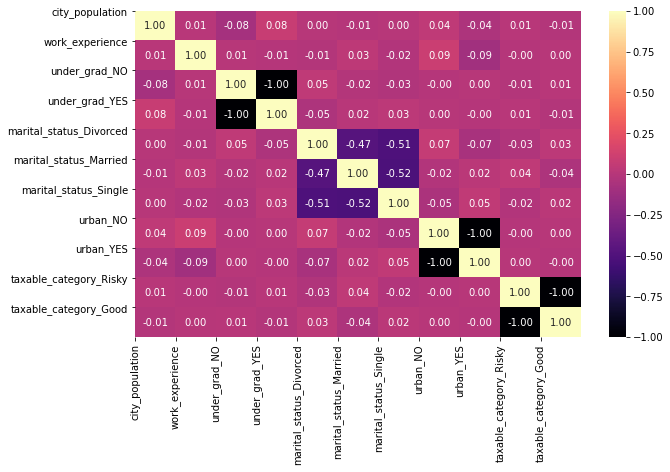

In [86]:
# Correlation analysis for data11
corr = data.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 6))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [133]:
X = data.drop('taxable_category', axis = 1)
y = data['taxable_category']

In [134]:
X

,city_population,work_experience,under_grad_NO,under_grad_YES,marital_status_Divorced,marital_status_Married,marital_status_Single,urban_NO,urban_YES,taxable_category_Risky,taxable_category_Good,taxable_category_Risky,taxable_category_Good
0,50047,10,1,0,0,0,1,0,1,0,1,0,1
1,134075,18,0,1,1,0,0,0,1,0,1,0,1
2,160205,30,1,0,0,1,0,0,1,0,1,0,1
3,193264,15,0,1,0,0,1,0,1,0,1,0,1
4,27533,28,1,0,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1,0,1,0,1
596,55369,2,0,1,1,0,0,0,1,0,1,0,1
597,154058,0,1,0,1,0,0,0,1,0,1,0,1
598,180083,17,0,1,0,1,0,1,0,0,1,0,1


In [135]:
y 

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: taxable_category, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [136]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(402, 13)
(198, 13)
(402,)
(198,)


# Random Forest Classification

In [137]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

num_trees = 100
max_features = 'auto'
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)

In [138]:
# Train the model on training data
model.fit(x_train, y_train)

RandomForestClassifier()

In [139]:
skfolds=StratifiedKFold(n_splits=10, shuffle=True, random_state=42)



In [140]:
skfolds

StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

In [141]:
results = cross_val_score(model, x_train, y_train, cv=skfolds)
print(results.mean())

1.0


# Bagged Decision Trees for Classification

In [142]:
from sklearn.ensemble import BaggingClassifier

skfolds=StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=42)
results = cross_val_score(model, x_train, y_train, cv=skfolds)
print(results.mean())

1.0


# AdaBoost Classification

In [143]:
from sklearn.ensemble import BaggingClassifier

skfolds=StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=42)
results = cross_val_score(model, x_train, y_train, cv=skfolds)
print(results.mean())

1.0
